In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pycountry
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import data set from kaggle https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016
data=pd.read_csv("C:\\Users\\Arboy\\Desktop\\Capstone\\suicide.csv")

In [5]:
#inspect dataset

#check the total rows and column (verify it falls the capstone requirement of 500 rows)
print('Data Shape:', data.shape)
if data.shape[0] > 500:
    print('The DataFrame has more than 500 rows.')
else:
    print('The DataFrame has', data.shape[0], 'rows.')

Data Shape: (27820, 12)
The DataFrame has more than 500 rows.


In [6]:
#check the table headers
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#check if data sets contain information
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [9]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [10]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
 #check for null data
data.isnull().any()


country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [12]:
#check the level of null data
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [13]:
#check the country's column, verify county names and spelling
distinct_countries = data['country'].unique()
print("Distinct Countries:")
print(distinct_countries)

Distinct Countries:
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia'

In [14]:
#check if country name is in the pycountry library
country_column = 'country'

unique_countries = data[country_column].unique()

invalid_countries = []

for country_name in unique_countries:
    if not pycountry.countries.get(name=country_name):
        invalid_countries.append(country_name)

print("Invalid Countries:")
for country_name in invalid_countries:
    print(country_name)

Invalid Countries:
Czech Republic
Macau
Republic of Korea
Saint Vincent and Grenadines
Turkey


In [15]:
#Verify the date range of the data set
min_year=min(data.year)
max_year=max(data.year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1985
Max Year : 2016


In [16]:
distinct_years = data['year'].unique()
print("Distinct Years:")
print(distinct_years)

Distinct Years:
[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]


In [17]:
#check the sex column
distinct_sexes = data['sex'].unique()
print("Distinct Sexes:")
print(distinct_sexes)

Distinct Sexes:
['male' 'female']


In [18]:
distinct_ages = data['age'].unique()
print("Distinct Age Groups:")
print(distinct_ages)

Distinct Age Groups:
['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


In [17]:
#Items Formatting / cleaning:

#Column title need to be Improved upon

#Column "HDI for year" has mostly incomplete data 69.9% is null or missing.  It will be laborious to produce, and too few to use the average or extrapolate. Column will be removed

#Column "country-year" is deemed redundant given that there are already columns for country and year, it will be also harder to use in the analysis given that the data under country should be object/string while that in year should be date. Column will also be removed

#datatype in column gdp_for_year ($) is identified as an object, but it should be a number

#the following are identified as Invalid Countries in pycountry: Czech Republic, Macau, Republic of Korea, Saint, Vincent and Grenadines, Turkey.  Their names will be changed based on pycountry library. Czechia, Korea, Republic of, Macao, Türkiye, Saint Vincent and the Grenadines

#No Error in Year

#No error in sexes

#No error in age group but the ordinal arrangement need to be improved ['5-14 years' '15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years']


In [19]:
#Improving the column headers
data = data.rename(columns={
    'country': 'Country',
    'year': 'Year',
    'sex': 'Gender',
    'age': 'Age',
    'suicides_no': 'SuicidesNo',
    'population': 'Population',
    'suicides/100k pop': 'Suicides100kPop',
    'country-year': 'CountryYear',
    'HDI for year': 'HDIForYear',
    ' gdp_for_year ($) ': 'GdpForYear',
    'gdp_per_capita ($)': 'GdpPerCapital',
    'generation': 'Generation'
})

In [20]:
#check if the table headers are updated
data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYear',
       'GdpPerCapital', 'Generation'],
      dtype='object')

In [21]:
#Removing Column with incomplete data and Redundant Column
columns_to_drop = ['HDIForYear', 'CountryYear']

columns_exist = all(column in data.columns for column in columns_to_drop)

if columns_exist:
    data = data.drop(columns_to_drop, axis=1)
else:
    print("One or more columns to drop do not exist in the DataFrame.")

In [22]:
#replacing data type in GdPForYear from object to number
data['GdpForYear'] = pd.to_numeric(data['GdpForYear'].str.replace(',', ''), errors='coerce')

In [23]:
#checking of changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          27820 non-null  object 
 1   Year             27820 non-null  int64  
 2   Gender           27820 non-null  object 
 3   Age              27820 non-null  object 
 4   SuicidesNo       27820 non-null  int64  
 5   Population       27820 non-null  int64  
 6   Suicides100kPop  27820 non-null  float64
 7   GdpForYear       27820 non-null  int64  
 8   GdpPerCapital    27820 non-null  int64  
 9   Generation       27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [24]:
#checking if data is altered or courrpted
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYear,GdpPerCapital,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [25]:
#checking if any date became null
data.isnull().any()

Country            False
Year               False
Gender             False
Age                False
SuicidesNo         False
Population         False
Suicides100kPop    False
GdpForYear         False
GdpPerCapital      False
Generation         False
dtype: bool

In [26]:
#Formatting Country Names
corrections = {
    'Czech Republic': 'Czechia',
    'Macau': 'Macao',
    'Republic of Korea': 'Korea, Republic of',
    'Saint Vincent and Grenadines': 'Saint Vincent and the Grenadines',
    'Turkey': 'Türkiye'
}

country_column = 'Country'

data[country_column] = data[country_column].replace(corrections)

In [27]:
#check if corrections worked
country_column = 'Country'

unique_countries = data[country_column].unique()

invalid_countries = []

for country_name in unique_countries:
    if not pycountry.countries.get(name=country_name):
        invalid_countries.append(country_name)

print("Invalid Countries:")
for country_name in invalid_countries:
    print(country_name)

Invalid Countries:


In [28]:
# Ensuring the ordinal arrangeent of the Age group
ordered_categories = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

data['Age'] = pd.Categorical(data['Age'], categories=ordered_categories, ordered=True)

In [32]:
#Checking for incomplete or missing data

In [29]:
#checking of completeness per year
min_year = data['Year'].min()
max_year = data['Year'].max()

missing_country_counts = {}

for year in range(min_year, max_year + 1):
    missing_countries = []
    for country in distinct_countries:
        country_data = data[(data['Country'] == country) & (data['Year'] == year)]
        
        if country_data.empty:
            missing_countries.append(country)
    
    missing_country_counts[year] = len(missing_countries)
    
for year, count in missing_country_counts.items():
    print(f"No data found for {count} countries in {year}.")

No data found for 55 countries in 1985.
No data found for 55 countries in 1986.
No data found for 49 countries in 1987.
No data found for 53 countries in 1988.
No data found for 50 countries in 1989.
No data found for 40 countries in 1990.
No data found for 39 countries in 1991.
No data found for 38 countries in 1992.
No data found for 38 countries in 1993.
No data found for 36 countries in 1994.
No data found for 26 countries in 1995.
No data found for 27 countries in 1996.
No data found for 27 countries in 1997.
No data found for 25 countries in 1998.
No data found for 21 countries in 1999.
No data found for 18 countries in 2000.
No data found for 16 countries in 2001.
No data found for 18 countries in 2002.
No data found for 18 countries in 2003.
No data found for 20 countries in 2004.
No data found for 20 countries in 2005.
No data found for 19 countries in 2006.
No data found for 18 countries in 2007.
No data found for 19 countries in 2008.
No data found for 16 countries in 2009.


In [31]:
#Check Missing Data per country
data_filtered = data[(data['Year'] >= 1995) & (data['Year'] <= 2014)]

distinct_countries = ['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
                      'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium',
                      'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada',
                      'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
                      'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
                      'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland',
                      'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                      'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
                      'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman',
                      'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
                      'Korea, Republic of', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis',
                      'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Serbia', 'Seychelles',
                      'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Suriname',
                      'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Türkiye', 'Turkmenistan',
                      'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan']

min_year = data_filtered['Year'].min()
max_year = data_filtered['Year'].max()

missing_year_counts = {}

for country in distinct_countries:
    missing_years = []
    for year in range(min_year, max_year + 1):
        country_data = data_filtered[(data_filtered['Country'] == country) & (data_filtered['Year'] == year)]
        
        if country_data.empty:
            missing_years.append(year)
    
    missing_year_counts[country] = len(missing_years)
    
for country, count in missing_year_counts.items():
    print(f"No data found for {country} for {count} years.")

No data found for Albania for 4 years.
No data found for Antigua and Barbuda for 4 years.
No data found for Argentina for 0 years.
No data found for Armenia for 2 years.
No data found for Aruba for 6 years.
No data found for Australia for 1 years.
No data found for Austria for 0 years.
No data found for Azerbaijan for 9 years.
No data found for Bahamas for 1 years.
No data found for Bahrain for 2 years.
No data found for Barbados for 5 years.
No data found for Belarus for 4 years.
No data found for Belgium for 0 years.
No data found for Belize for 0 years.
No data found for Bosnia and Herzegovina for 18 years.
No data found for Brazil for 0 years.
No data found for Bulgaria for 0 years.
No data found for Cabo Verde for 19 years.
No data found for Canada for 1 years.
No data found for Chile for 0 years.
No data found for Colombia for 0 years.
No data found for Costa Rica for 0 years.
No data found for Croatia for 0 years.
No data found for Cuba for 0 years.
No data found for Cyprus for 

In [44]:
#Filtering and Saving to a new CSV File.
indices_to_delete = data[(data['Year'] < 1995) | (data['Year'] > 2014)].index

data_filtered = data.drop(indices_to_delete)

countries_to_remove = ['Albania', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Australia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Bosnia and Herzegovina', 'Cabo Verde', 'Canada', 'Cyprus', 'Dominica', 'Fiji', 'Georgia', 'Grenada', 'Guyana', 'Jamaica',
                       'Kiribati', 'Macao', 'Maldives', 'Mongolia', 'Montenegro', 'New Zealand', 'Nicaragua', 'Panama', 'Philippines', 'Poland', 'Portugal', 'Oman', 'Qatar',
                       'Saint Kitts and Nevis', 'Saint Lucia', 'San Marino', 'Serbia', 'Seychelles', 'Slovakia', 'Sri Lanka', 'South Africa', 'Thailand', 'Trinidad', 'Türkiye', 'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Ukraine']

filtered_data = data_filtered[~data_filtered['Country'].isin(countries_to_remove)]

num_rows, num_cols = filtered_data.shape
print("Number of rows remaining:", num_rows)
print("Number of columns:", num_cols)

print(filtered_data.head())

# Save the filtered DataFrame to a CSV file
file_path = r'C:\Users\Arboy\Desktop\Capstone\cleaned_data.csv'
filtered_data.to_csv(file_path, index=False)

print("Cleaned data saved successfully.")

Number of rows remaining: 12924
Number of columns: 10
       Country  Year Gender          Age  SuicidesNo  Population  \
708  Argentina  1995   male    75+ years         190      433800   
709  Argentina  1995   male  55-74 years         515     2214000   
710  Argentina  1995   male  35-54 years         485     3787800   
711  Argentina  1995   male  25-34 years         218     2404900   
712  Argentina  1995   male  15-24 years         277     3112100   

     Suicides100kPop    GdpForYear  GdpPerCapital       Generation  
708            43.80  258031750000           8232  G.I. Generation  
709            23.26  258031750000           8232           Silent  
710            12.80  258031750000           8232          Boomers  
711             9.06  258031750000           8232     Generation X  
712             8.90  258031750000           8232     Generation X  
Cleaned data saved successfully.


In [46]:
#DATA VISUALIZATION

In [52]:
#load cleaned data set
data2=pd.read_csv("C:\\Users\\Arboy\\Desktop\\Capstone\\cleaned_data.csv")

In [53]:
#Needed Conversion for Year datatype
data2['Year'] = data2['Year'].astype(str)

# Add a new column representing the date
data2['Date'] = data2['Year'] + '-01-01'  # Assuming January 1st of each year

# Convert the new column to datetime format
data2['Date'] = pd.to_datetime(data2['Date'])

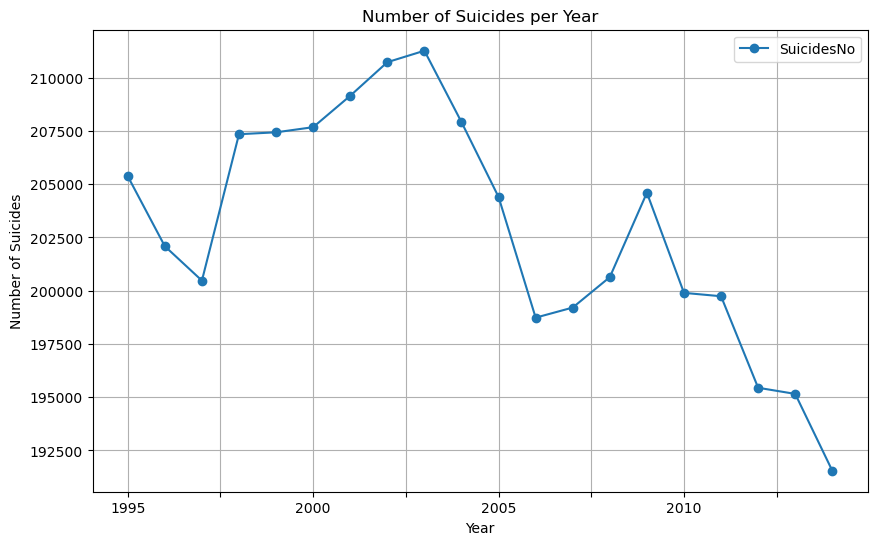

In [54]:
suicides_per_year = data2[['Year', 'SuicidesNo']]

suicides_per_year = suicides_per_year.groupby('Year').sum()

suicides_per_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Suicides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.show()

In [64]:
#Top10 Countries in no. of suicides
suicides_per_country = data2[['Country', 'SuicidesNo']]

suicides_per_country = suicides_per_country.groupby('Country').sum()

suicides_per_country = suicides_per_country.sort_values(by='SuicidesNo', ascending=False)

top_10_countries = suicides_per_country.head(10)

print("Summary table of the top 10 countries in terms of number of suicides:")
print(top_10_countries)

Summary table of the top 10 countries in terms of number of suicides:
                    SuicidesNo
Country                       
Russian Federation      904891
United States           683734
Japan                   566082
Germany                 214374
Korea, Republic of      213703
France                  209781
Brazil                  166780
United Kingdom           85365
Mexico                   85182
Italy                    82752


In [59]:
#lowest10 contries in no. of suicides
suicides_per_country2 = data2[['Country', 'SuicidesNo']]

suicides_per_country2 = suicides_per_country2.groupby('Country').sum()

suicides_per_country2 = suicides_per_country2.sort_values(by='SuicidesNo', ascending=True)

lowest_10_countries = suicides_per_country2.head(10)

print("Summary table of the lowest 10 countries in terms of number of suicides:")
print(lowest_10_countries)

Summary table of the lowest 10 countries in terms of number of suicides:
                                  SuicidesNo
Country                                     
Saint Vincent and the Grenadines         114
Belize                                   300
Malta                                    448
Iceland                                  710
Kuwait                                   869
Luxembourg                              1230
Suriname                                1759
Mauritius                               2412
Trinidad and Tobago                     2647
Paraguay                                4253


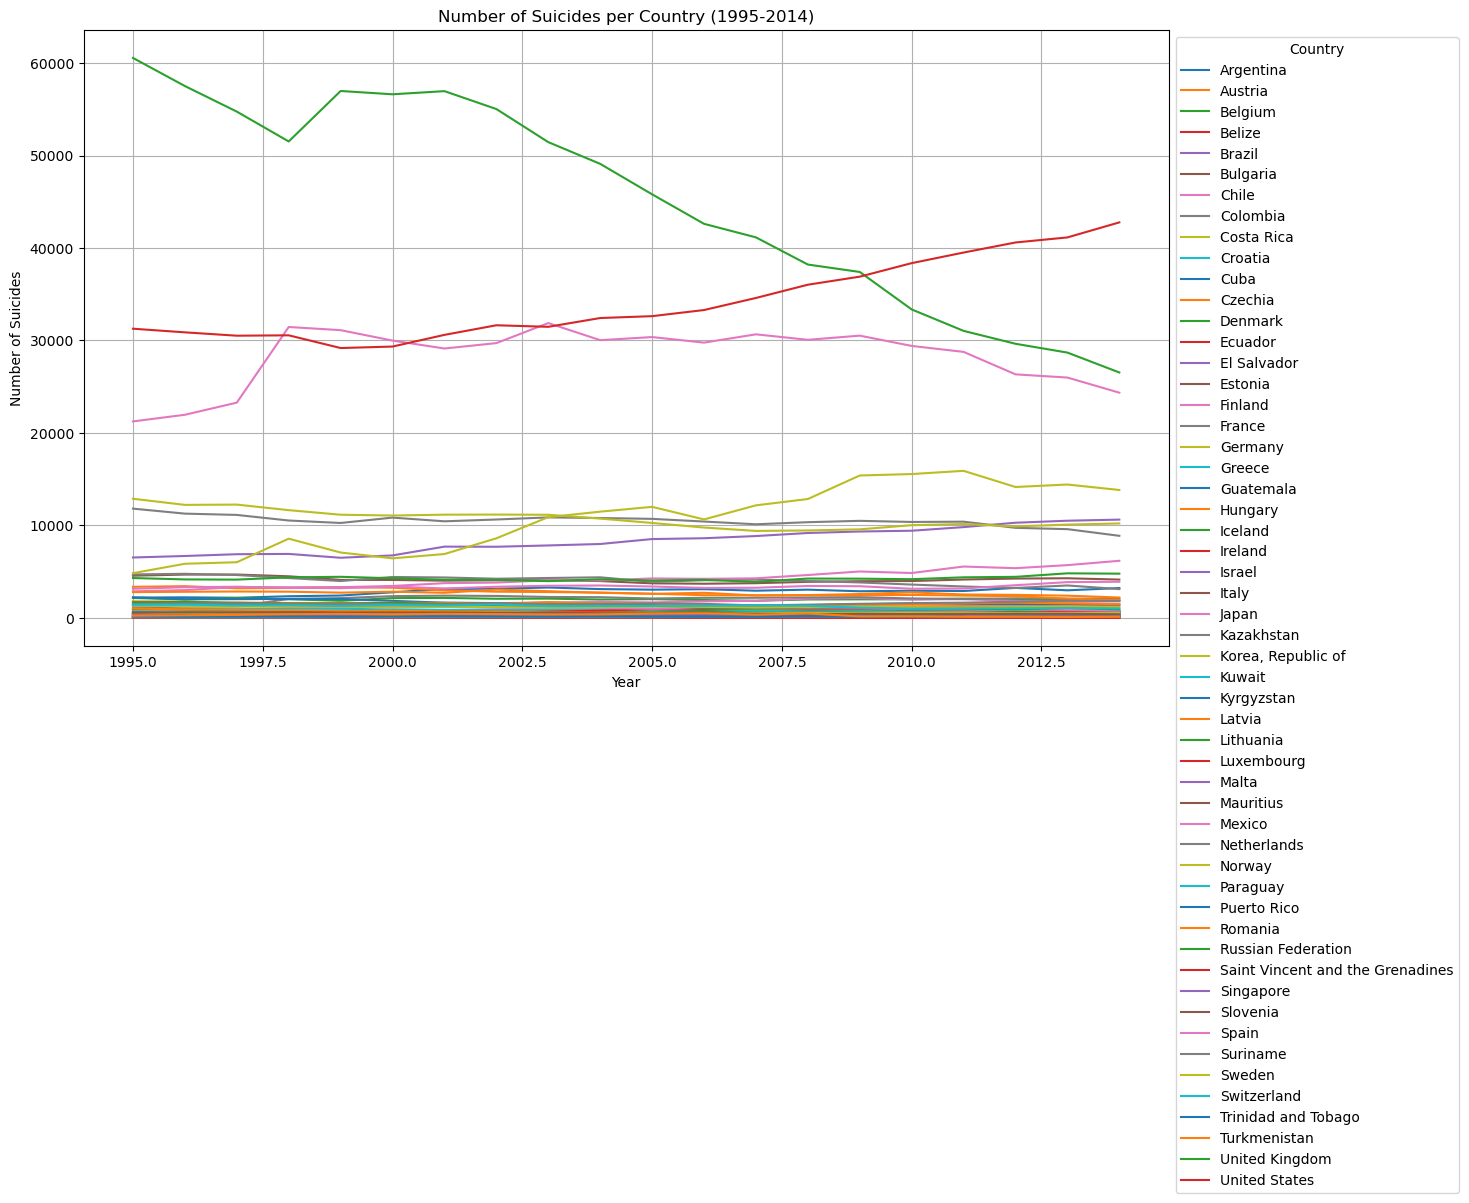

In [62]:
#No. of Suicide per country
suicides_per_country_year3 = data2[['Country', 'Year', 'SuicidesNo']]

suicides_per_country_year3['Year'] = pd.to_numeric(suicides_per_country_year3['Year'])

suicides_per_country_year3 = suicides_per_country_year3[(suicides_per_country_year3['Year'] >= 1995) & (suicides_per_country_year3['Year'] <= 2014)]

suicides_per_country_year3 = suicides_per_country_year3.groupby(['Country', 'Year']).sum().reset_index()

suicides_per_country_year3 = suicides_per_country_year3.pivot(index='Year', columns='Country', values='SuicidesNo')

suicides_per_country_year3.plot(kind='line', figsize=(14, 8))
plt.title('Number of Suicides per Country (1995-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [68]:
#No. of Suicides per country
suicides_per_country_year4 = data2.groupby(['Country', 'Year'])['SuicidesNo'].sum().reset_index()

total_suicides_per_country = suicides_per_country_year4.groupby('Country')['SuicidesNo'].sum()

sorted_countries = total_suicides_per_country.sort_values(ascending=False).index

suicides_per_country_year4_pivot = suicides_per_country_year4.pivot(index='Country', columns='Year', values='SuicidesNo')
suicides_per_country_year4_pivot = suicides_per_country_year4_pivot.loc[sorted_countries]

print("Number of suicides per country per year (sorted by total number of suicides):")
print(suicides_per_country_year4_pivot)

Number of suicides per country per year (sorted by total number of suicides):
Year                                 1995     1996     1997     1998     1999  \
Country                                                                         
Russian Federation                60548.0  57511.0  54746.0  51518.0  56974.0   
United States                     31272.0  30879.0  30517.0  30558.0  29183.0   
Japan                             21249.0  21967.0  23280.0  31458.0  31115.0   
Germany                           12888.0  12225.0  12256.0  11654.0  11160.0   
Korea, Republic of                 4841.0   5857.0   6024.0   8569.0   7075.0   
France                            11819.0  11279.0  11139.0  10534.0  10268.0   
Brazil                             6536.0   6698.0   6891.0   6922.0   6507.0   
United Kingdom                     4315.0   4165.0   4143.0   4389.0   4448.0   
Mexico                             2877.0   3008.0   3350.0   3312.0   3327.0   
Italy                          

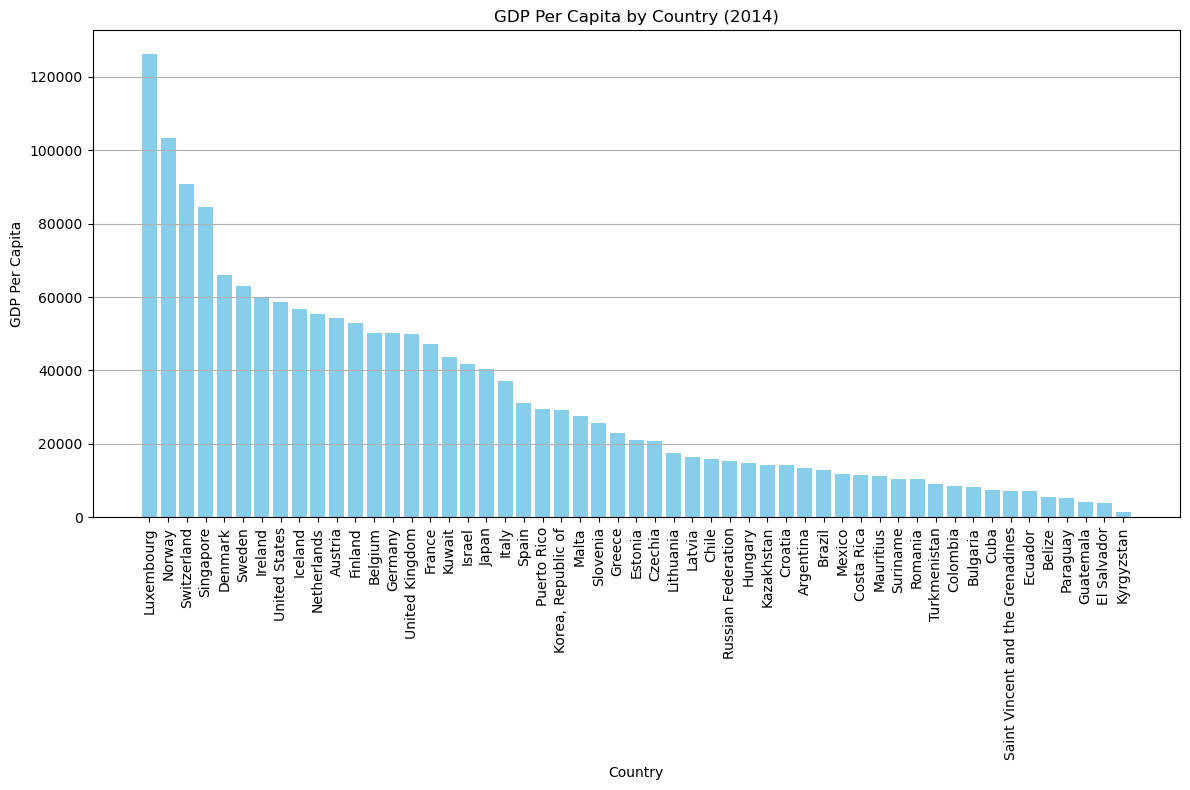

In [80]:
#BarChart GDP 2014
data_2014 = data2[data['Year'] == 2014]

gdp_per_country = data_2014.groupby('Country')['GdpPerCapital'].mean().reset_index()

gdp_per_country_sorted = gdp_per_country.sort_values(by='GdpPerCapital', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(gdp_per_country_sorted['Country'], gdp_per_country_sorted['GdpPerCapital'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Country (2014)')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

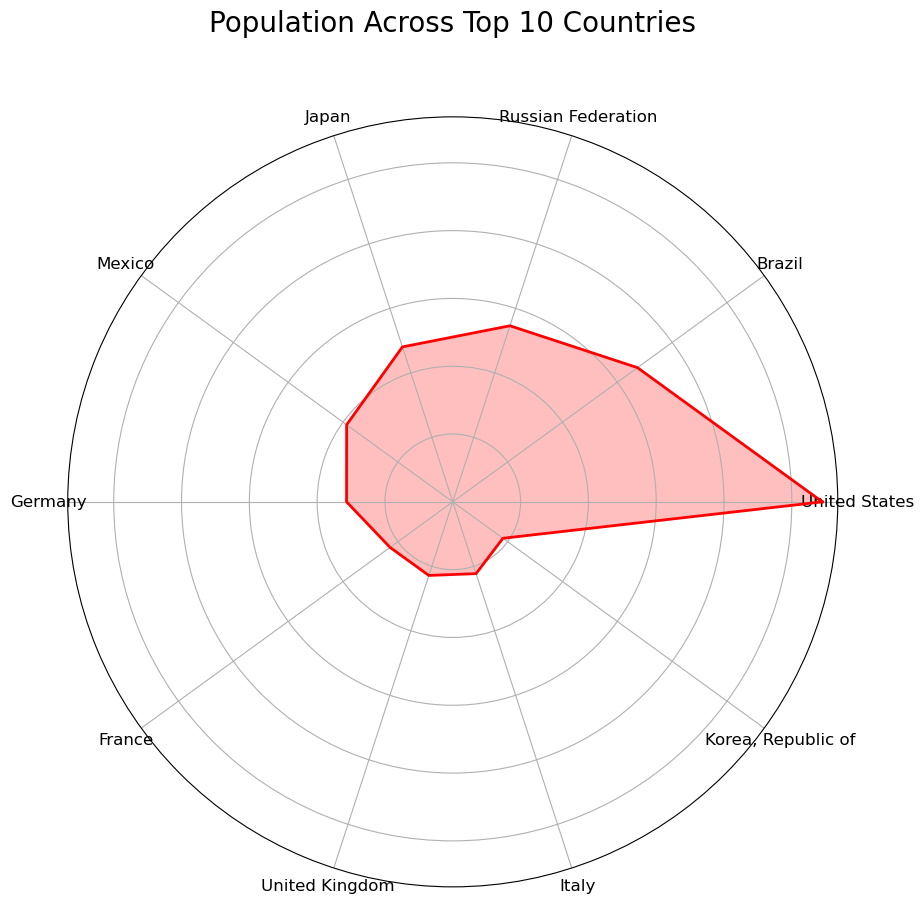

In [71]:
#Radial Chart for Popoulation of Top10 Countries
population_by_country = data.groupby('Country')['Population'].sum().reset_index()

population_by_country = population_by_country.sort_values(by='Population', ascending=False)

top_countries = population_by_country.head(10)

countries = top_countries['Country']
population_values = top_countries['Population']

num_vars = len(countries)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

population_values = np.concatenate((population_values.values,[population_values.values[0]]))
angles += angles[:1]

ax.plot(angles, population_values, color='red', linewidth=2)

ax.fill(angles, population_values, color='red', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(countries, fontsize=12)

plt.title('Population Across Top 10 Countries', size=20, color='black', y=1.1)

plt.show()

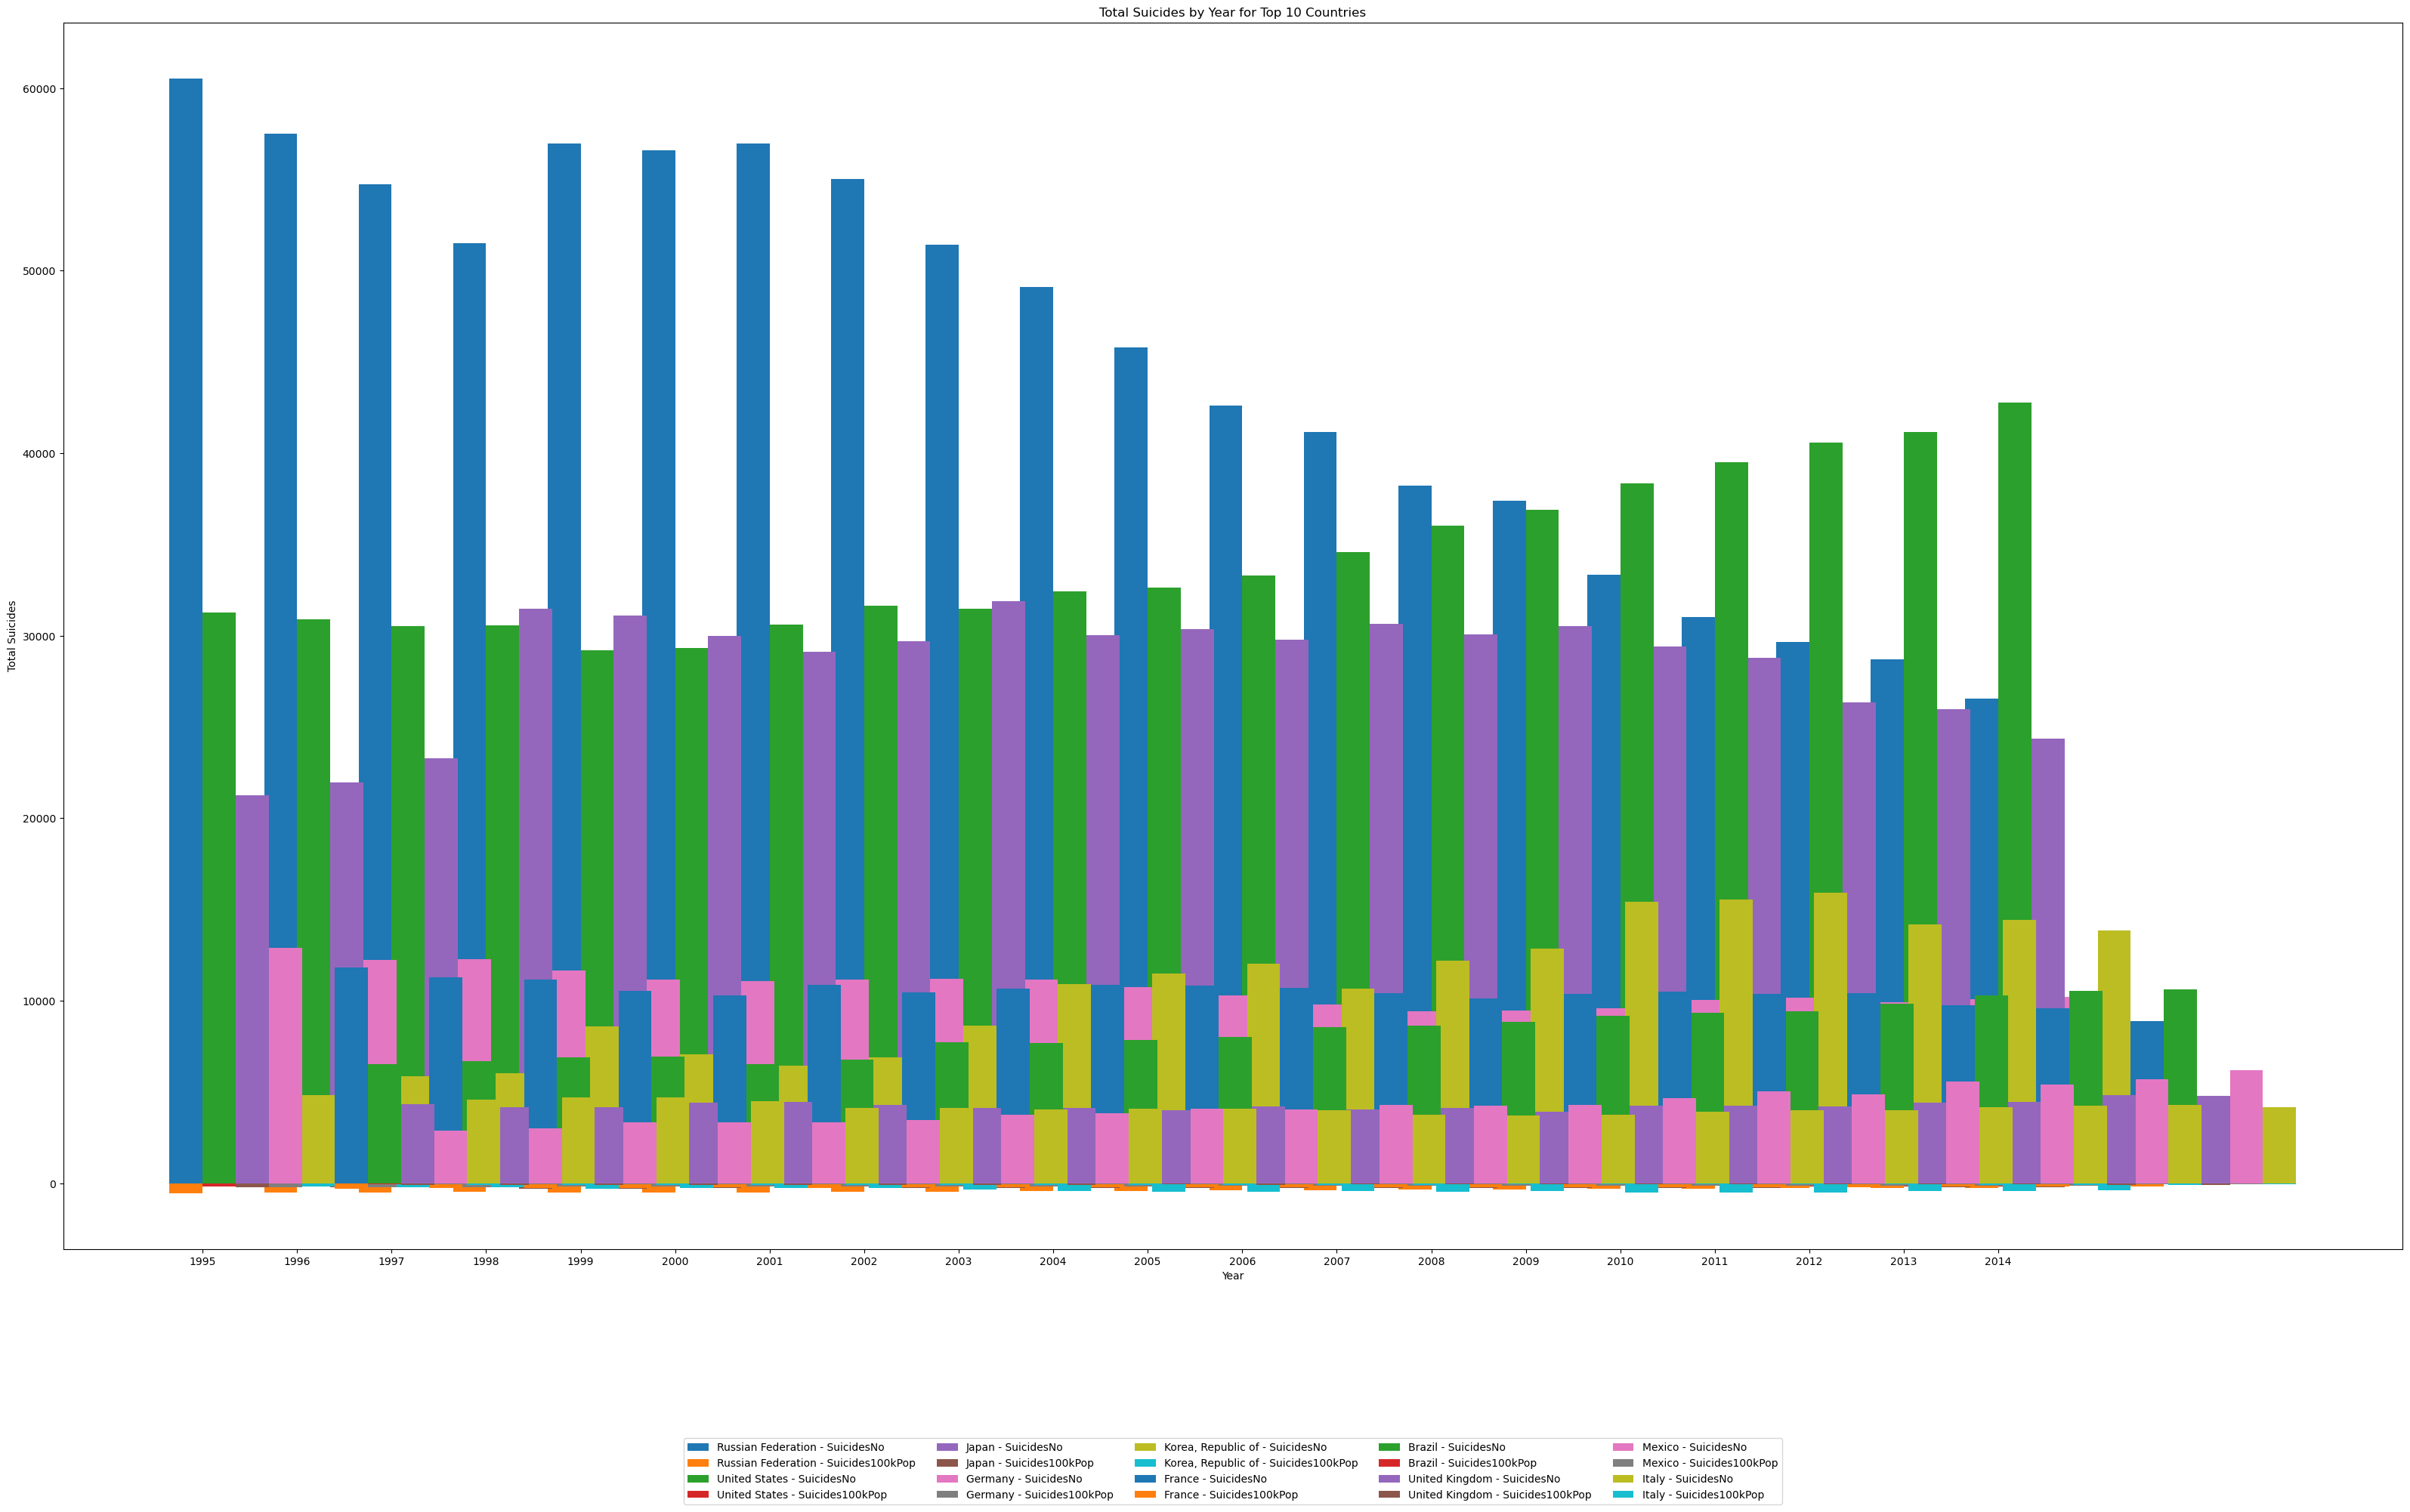

In [93]:
#Butterfly Chart No.of Suicides and Suicides per 100K population (Top 10)
suicides_by_country = data2.groupby('Country')[['SuicidesNo', 'Suicides100kPop']].sum().reset_index()

top_10_countries = suicides_by_country.nlargest(10, 'SuicidesNo')['Country']

data_top_10 = data2[data2['Country'].isin(top_10_countries)]

suicides_top_10_total = data_top_10.groupby(['Country', 'Year'])[['SuicidesNo', 'Suicides100kPop']].sum().reset_index()

fig, ax = plt.subplots(figsize=(32, 20))

bar_width = 0.35

index = suicides_top_10_total['Year'].unique()

for i, country in enumerate(top_10_countries):
    country_data = suicides_top_10_total[suicides_top_10_total['Country'] == country]
    ax.bar(index.astype(int) + (i * bar_width), country_data['SuicidesNo'], bar_width, label=f'{country} - SuicidesNo')
    ax.bar(index.astype(int) + (i * bar_width), -country_data['Suicides100kPop'], bar_width, label=f'{country} - Suicides100kPop')

ax.set_xticks(index.astype(int) + bar_width / 2)
ax.set_xticklabels(index.astype(int))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
ax.set_xlabel('Year')
ax.set_ylabel('Total Suicides')
ax.set_title('Total Suicides by Year for Top 10 Countries')

plt.tight_layout()
plt.show()

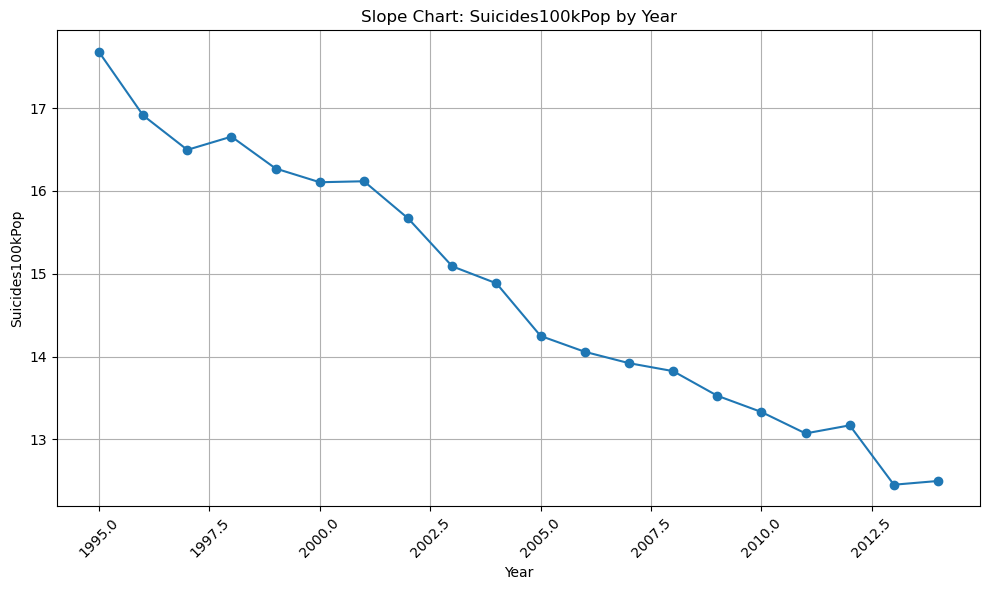

In [76]:
#Slope Chart Suicide per 100k over the years
suicides_by_year6 = data.groupby('Year')['Suicides100kPop'].mean().reset_index()

suicides_by_year6 = suicides_by_year6.sort_values(by='Year')

plt.figure(figsize=(10, 6))
plt.plot(suicides_by_year6['Year'], suicides_by_year6['Suicides100kPop'], marker='o', linestyle='-')
plt.title('Slope Chart: Suicides100kPop by Year')
plt.xlabel('Year')
plt.ylabel('Suicides100kPop')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

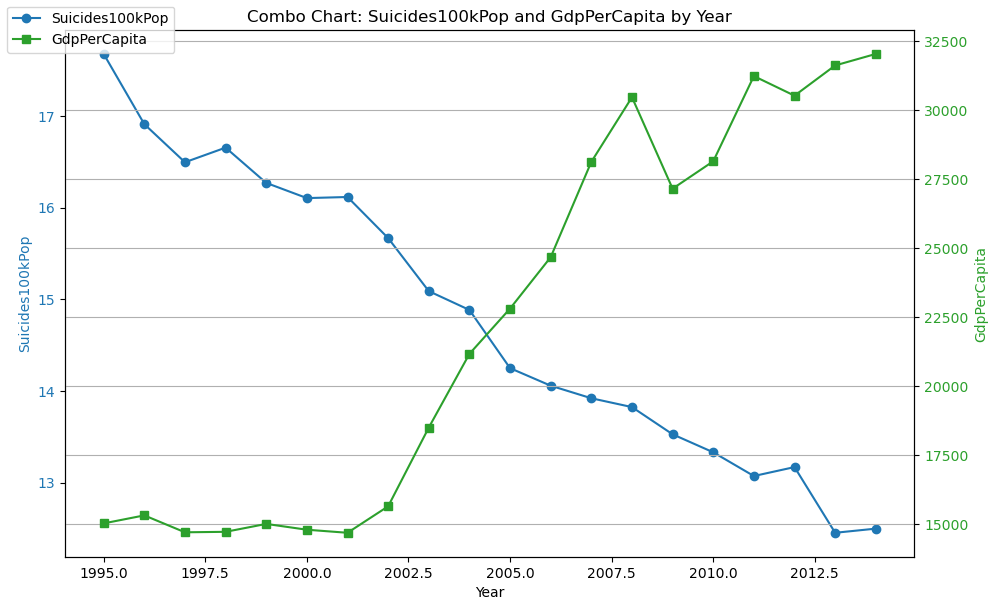

In [77]:
# Dual axis charts on the Suicides per 100k Population and the GDP Per Capita
suicides_gdp_by_year = data.groupby('Year').agg({'Suicides100kPop': 'mean', 'GdpPerCapital': 'mean'}).reset_index()

# Plot the combo chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Suicides100kPop on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Suicides100kPop', color=color)
ax1.plot(suicides_gdp_by_year['Year'], suicides_gdp_by_year['Suicides100kPop'], color=color, marker='o', label='Suicides100kPop')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for GdpPerCapita
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('GdpPerCapita', color=color)
ax2.plot(suicides_gdp_by_year['Year'], suicides_gdp_by_year['GdpPerCapital'], color=color, marker='s', label='GdpPerCapita')
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.tight_layout()
fig.legend(loc='upper left')

plt.title('Combo Chart: Suicides100kPop and GdpPerCapita by Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()